Price,Close,High,Low,Open,Volume,MA200,MA50,Strategy200,Strategy50,asset_cumulative,strategy_cumulative200,strategy_cumulative50
Date,,,,,,,,,,,,
1993-11-11,26.050598,26.191033,26.033044,26.120815,88900,25.163892,25.959080,NaN,NaN,NaN,NaN,NaN
1993-11-12,26.173464,26.261235,26.085692,26.103247,108200,25.173552,25.965112,1.0,1.0,0.004716,0.004716,0.004716
1993-11-15,26.155895,26.226112,26.085678,26.226112,243300,25.182263,25.970444,1.0,1.0,0.004042,0.004042,0.004042
1993-11-16,26.278790,26.296344,26.103247,26.208572,492600,25.191329,25.981724,1.0,1.0,0.008760,0.008760,0.008760
1993-11-17,26.138357,26.296346,26.068140,26.296346,39600,25.198400,25.991939,1.0,1.0,0.003369,0.003369,0.003369
...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-26,692.729980,694.130005,689.919983,690.489990,60473800,634.959031,681.090768,1.0,1.0,25.591711,3.015382,-0.575508
2026-01-27,695.489990,696.530029,693.570007,694.179993,55506100,635.717063,681.373235,1.0,1.0,25.697659,3.031380,-0.573817
2026-01-28,695.419983,697.840027,693.940002,697.049988,61172200,636.593908,681.880435,1.0,1.0,25.694972,3.030974,-0.573860


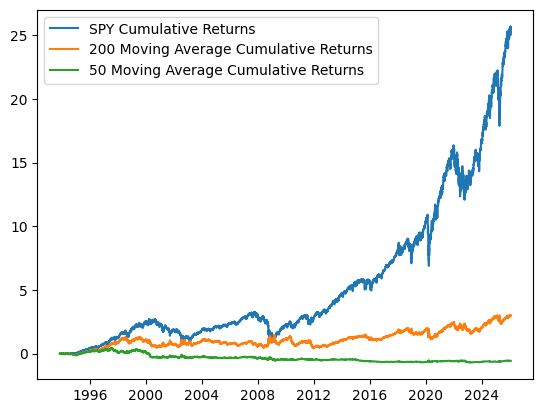

In [25]:
# Imports
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Variablen
TICKER = 'SPY'
WINDOW_200 = 200
WINDOW_50 = 50

# Funktionen
def get_data():
    # Downloaden der Daten von Tickervariable in eine Dataframe
    df = yf.download(
    TICKER,
    period="max",
    progress=False)
    df.columns = df.columns.get_level_values(0)

    df['MA200'] = df['Close'].rolling(WINDOW_200).mean()
    df['MA50'] = df['Close'].rolling(WINDOW_50).mean()

    return df.dropna()

def sma200(df):
    df['Strategy200'] = np.where(df['Close'] > df['MA200'], 1, -1)
    df['Strategy200'] = df['Strategy200'].shift(1)
    return df

def sma50(df):
    df['Strategy50'] = np.where(df['Close'] > df['MA50'], 1, -1)
    df['Strategy50'] = df['Strategy50'].shift(1)
    return df

def test_strategy(df):
    df['asset_cumulative'] = np.cumprod(1 + df['Close'].pct_change()) -1
    df['strategy_cumulative200'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy200']) -1
    df['strategy_cumulative50'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy50']) -1

    # plot the returns
    plt.plot(df['asset_cumulative'])
    plt.plot(df['strategy_cumulative200'])
    plt.plot(df['strategy_cumulative50'])

    plt.legend([f'{TICKER} Cumulative Returns', f'{WINDOW_200} Moving Average Cumulative Returns', f'{WINDOW_50} Moving Average Cumulative Returns'])
    return df

def main():
    df = get_data()
    df = sma200(df)
    df = sma50(df)
    df = test_strategy(df)

    return df

main()